In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [3]:
train_path= 'D:/Download/chest_xray/train'
test_path= 'D:/Download/chest_xray/test'

In [4]:
train_data= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_data= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [5]:
train_generator = train_data.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = test_data.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ ?                           │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lrp = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath = 'best_model.keras'  # Change filepath extension to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint, lrp]

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=30,
    callbacks=callbacks
)

Epoch 1/10


D:\Pycharm_Projects\Data_Science_Internship\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - AUC: 0.6789 - Precision: 0.8648 - Recall: 0.5877 - accuracy: 0.6026 - loss: 0.9454
Epoch 1: val_accuracy improved from -inf to 0.75321, saving model to best_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - AUC: 0.6839 - Precision: 0.8663 - Recall: 0.5910 - accuracy: 0.6063 - loss: 0.9375 - val_AUC: 0.8091 - val_Precision: 0.8138 - val_Recall: 0.7846 - val_accuracy: 0.7532 - val_loss: 0.5177 - learning_rate: 0.0010
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - AUC: 0.8958 - Precision: 0.8845 - Recall: 0.8079 - accuracy: 0.7889 - loss: 0.5267
Epoch 2: val_accuracy improved from 0.75321 to 0.78205, saving model to best_model.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - AUC: 0.8940 - Precision: 0.8840 - Recall: 0.8065 - accuracy: 0.7877 - loss: 0.5295 - val_AUC: 0.8400 - val_Precision: 0.7624 - val_Recall: 0.9462 - val_accuracy: 0.7821 - val_loss: 0.4954 - learning_rate: 0.0010
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - A

In [9]:
model.evaluate(train_generator)

1308/1308 ━━━━━━━━━━━━━━━━━━━━ 509s 389ms/step - AUC: 0.9834 - Precision: 0.9672 - Recall: 0.9580 - accuracy: 0.9445 - loss: 0.1618


[0.16447001695632935,
 0.9835294485092163,
 0.9678851366043091,
 0.954674243927002,
 0.9428516626358032]

In [10]:
model.evaluate(validation_generator)

156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 479ms/step - AUC: 0.9585 - Precision: 0.8377 - Recall: 0.9773 - accuracy: 0.8787 - loss: 0.2982


[0.2725428640842438,
 0.9688308238983154,
 0.8596882224082947,
 0.9897435903549194,
 0.8926281929016113]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[0.86988723]]
THE UPLOADED X-RAY IMAGE IS: NewMonia


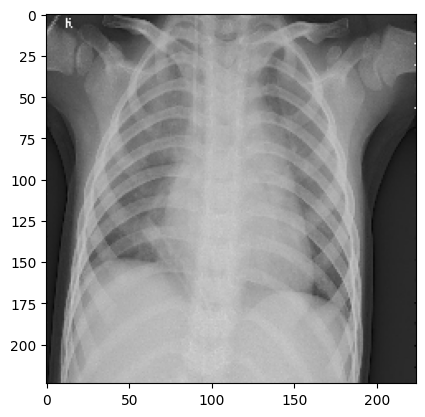

In [20]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img("D:/Download/chest_xray/train/PNEUMONIA/BACTERIA-4233560-0002.jpeg",target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="NORMAL"   
else:
      op="NewMonia"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))